In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
import pickle
import math

In [2]:
# Check that TF version (2.1.0 - 2.3.2 should be fine)
print(tf.__version__)

1.14.0


# For turn-in move all answers to questions and requested plots to top of notebook or this will not be graded. Also make a final clean run of your code so the cells execute in order.

### Points awarded for correct working models, questions, and plots.

[+10 per model correct and working -5 for failure on either]

**1.1 Answer the following questions:**
1.   Explain the indication of overfitting and how this occurs (provide plot supporting your answer)? [+4 answer, +4 plot, +2 answer and plot agree]


    Overfitting: the training model corresponds too closely to a particular set of data, therefore fail to fit test data or predict       future observations.

    How this occurs: as the picture bellow displayed. When the train accuracy increases, the test accuracy increases to a point and       then stops or decreases loss decreases. And the loss has similar cases.
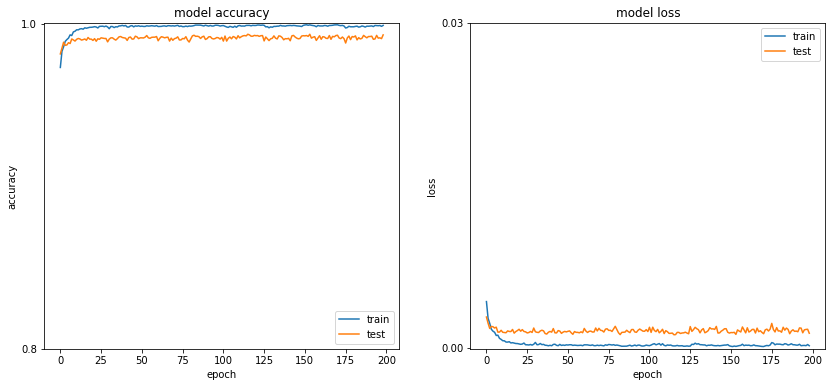


2.   Explain how overfit can hinder performance of a model when deployed. [+6 answer]


    The model fits training data too well, so that the noise and outlier are also reflected in it. In this way, the model descibes not   only the relationship among data, but the random error in data. This problem would lead to higher error when performs on test data.   Therefore, the model cannot generalize athe test data accurately, or even should not used to generalize test data. 
    
    
3.   Name two ways to avoid this. [+2 answer, +2 answer]


    a) Adding dropout layers.
    b) Training more examples.

**1.2 Answer the following question:** 
 1.   Explain how dropout affected your loss (provide plot supporting your answer). [+5 answer, +5 plot]
 
 
     The result of adding dropout layers between each two hidden layers is as bellow.When just add one dropout layer between input and first hidden layer, the loss gets slightly better than without it. And while utilizing dropout layers more, the result of loss become lower and keep decreasing when the training loss decreases. In conclusion, dropout is a significant method to prevent overfitting problems.
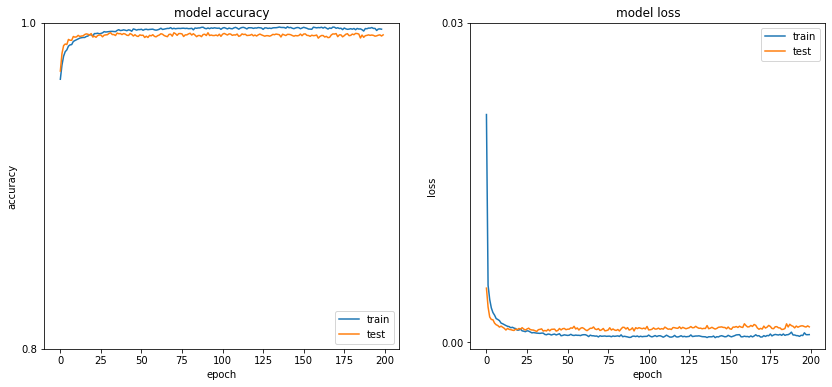

**Bonus Answer the following question:**
    
  1. Considering that encoder and decoder can be constructed as separate components, trained as a single unit, and then separated for use . What uses can you brainstorm?  [+5 bonus makeup points]
  
  
      The overfitting occurs after encoder accomplished and before decoder performing. So if the encoder and decoder are single unit and separated from the training model, then we can add dropout layer after encoder and before decoder to prevent overfitting problem. This will definitely increase the models accuracy and reduce its loss.

**2.1 Linear AE points for constructed model, no questions here.**

**2.2 Convolutional AE points for constructed model, no questions here.**

**2.3 Report histogram plot, mean and std. dev. of normal data, and confusion matrix for 2 standard deviations as results. Discuss your loss plot.** [+10 for greater than 75 TP, +10 all else]



    I designed the model based on the linear AE model in 2.1. To train data better, I decided to change the unit of dense layers from 400 to 100 to 400. This could help the model to capture more details in data and thus to attain better performance. Also, to prevent the overfitting problem, I added dropout layers after each dense layer except the output layer.    
    
    Since The abnormal data divided test data into groups and each group contains 64 batches. So to keep the number of 143, which is the test data group number, I reshaped the test data.  

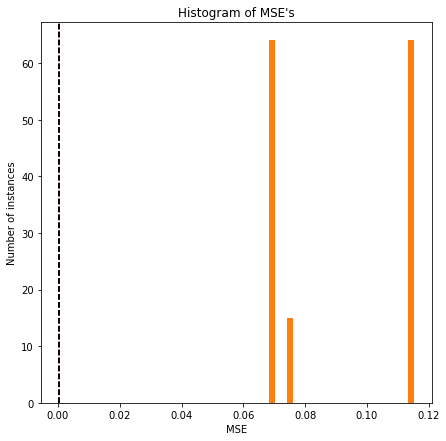   


<center>TP: 143 	 TN: 0</center>  
<center>FP: 0 	 FN: 1000</center>

parameter  | normal data | abnormal data |
----| ----------- | ----------- |
std.dev.| 1.3287359e-05 | 0.022653123 |
mean|0.00023621185|0.090162344|


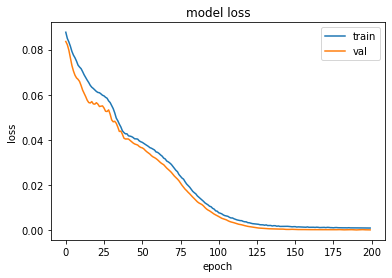


The loss of training data decreases from 0.087 to 0.001,and that of validating data decreases from 0.084 to 2e-5. Finally, both decreasing rate of the loss curve  slows down. From the plot we can prove that the autoencoder model can train data efficiently, and would not lead the validating data to overfitting. 

***Reminder: Achieve better than 75 anomalies***

In [19]:
#Import dataset and normalize to [0,1]
fashion_mnist = tf.keras.datasets.mnist
(data_train, labels_train), (data_test, labels_test) = fashion_mnist.load_data()
#Normalize

data_train, data_test = data_train / 255.0, data_test / 255.0

#data_train = tf.keras.utils.normalize(data_train)

#data_test = tf.keras.utils.normalize(data_test)
#Reshape
data_train = data_train.reshape(60000,28,28,1)
data_test = data_test.reshape(10000,28,28,1)
#Create labels as one-hot vectors
labels_train = tf.keras.utils.to_categorical(labels_train, num_classes=10)
labels_test = tf.keras.utils.to_categorical(labels_test, num_classes=10)

# Section 1 - CNN's

Fill in the model:
* Input: 28x28x1 grayscale image (1 specifies single channel grayscale).
* 1st hidden: 2D convolutional layer with 256 feature maps and 3x3 filters.
* 2nd hidden: A 2x2 maxpool layer.
* 3rd hidden: 2D convolutional layer with 128 feature maps and 3x3 filters.
* 4th hidden: A 2x2 maxpool layer.
* 5th hidden: Flatten layer to map 2D to 1D vector.
* 6th hidden: Dense layer of 100 perceptrons.
* 7th hidden: Dense layer of 100 perceptrons.
* Output: 10 perceptrons for classification.
<br>**Activations, bias, loss function, and optimizer are your choice.
<br>  Train for 200 epochs**

## 1.1 Overfitting 

In [72]:
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
#Create and train model architecture
labels_train = labels_train.reshape(60000,10)
def CNN_overfit():

    #Easiest way to build model in Keras is using Squential. It allows model to be build layer by layer as we will do here
    model = Sequential()
    #### Fill in Model ####
    model.add(tf.keras.Input(shape=(28, 28,1)))
    model.add(Conv2D(256, (3,3), activation='relu'))   
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(100))
    model.add(Dense(100))
    model.add(Dense(10,activation='softmax'))
    
#    model.fit(data_train,labels_train)
    return model

#Compile and train the model
CNN_overfit = CNN_overfit()
CNN_overfit.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history_overfit = CNN_overfit.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1000, shuffle=True)
scores = CNN_overfit.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 5s 84us/sample - loss: 0.0209 - acc: 0.8503 - val_loss: 0.0049 - val_acc: 0.9680
Epoch 2/200
60000/60000 [==============================] - 4s 66us/sample - loss: 0.0041 - acc: 0.9734 - val_loss: 0.0028 - val_acc: 0.9831
Epoch 3/200
60000/60000 [==============================] - 4s 68us/sample - loss: 0.0028 - acc: 0.9820 - val_loss: 0.0024 - val_acc: 0.9847
Epoch 4/200
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0023 - acc: 0.9856 - val_loss: 0.0020 - val_acc: 0.9861
Epoch 5/200
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0018 - acc: 0.9886 - val_loss: 0.0018 - val_acc: 0.9876
Epoch 6/200
60000/60000 [==============================] - 4s 67us/sample - loss: 0.0015 - acc: 0.9904 - val_loss: 0.0015 - val_acc: 0.9899
Epoch 7/200
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0013 - acc: 0.9918 - val_l

60000/60000 [==============================] - 4s 67us/sample - loss: 2.0431e-04 - acc: 0.9988 - val_loss: 0.0017 - val_acc: 0.9906
Epoch 114/200
60000/60000 [==============================] - 4s 65us/sample - loss: 1.8579e-04 - acc: 0.9990 - val_loss: 0.0020 - val_acc: 0.9894
Epoch 115/200
60000/60000 [==============================] - 4s 67us/sample - loss: 1.6679e-04 - acc: 0.9991 - val_loss: 0.0016 - val_acc: 0.9913
Epoch 116/200
60000/60000 [==============================] - 4s 64us/sample - loss: 2.1865e-04 - acc: 0.9988 - val_loss: 0.0014 - val_acc: 0.9920
Epoch 117/200
60000/60000 [==============================] - 4s 64us/sample - loss: 1.9783e-04 - acc: 0.9989 - val_loss: 0.0016 - val_acc: 0.9912
Epoch 118/200
60000/60000 [==============================] - 4s 68us/sample - loss: 1.4858e-04 - acc: 0.9992 - val_loss: 0.0015 - val_acc: 0.9918
Epoch 119/200
60000/60000 [==============================] - 4s 64us/sample - loss: 2.1108e-04 - acc: 0.9988 - val_loss: 0.0019 - val_acc:

In [ ]:
# Information contained in history dict.
print(history_overfit.history.keys())

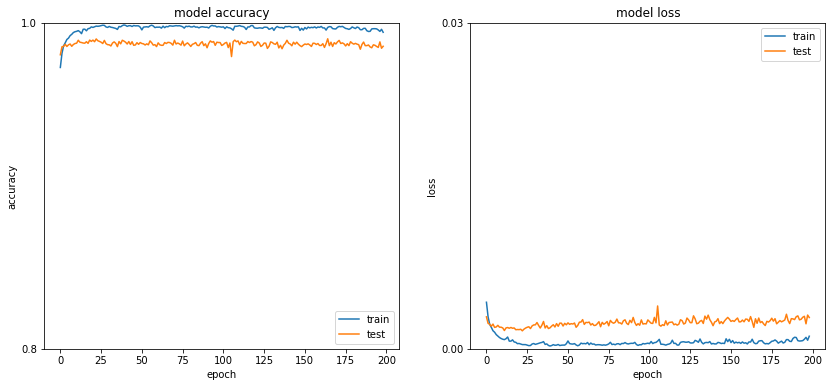

In [12]:
#Plot accuracy vs epoch
plt.figure(figsize=(14,6))
plt.subplot(121)

#### Fill in plot ####
plt.plot(history_overfit.history['acc'][1:])
plt.plot(history_overfit.history['val_acc'][1:])
plt.yticks([0.8,1])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

#Plot loss vs epoch
plt.subplot(122)
plt.plot(history_overfit.history['loss'][1:])
plt.plot(history_overfit.history['val_loss'][1:])
plt.yticks([0,0.03])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
#### Fill in plot ####


## 1.2 Improvements 

Using the network above, (1) insert a dropout of 30% between the input and first hidden layer. Run the model again and make note of the result. Next, (2 ) remove the dropout between input and hidden and add a dropout to each hidden layer except between softmax and output layer. Plot accuracy and loss only for (2). 

In [73]:
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
#Create and train model architecture
def CNN_dropout_hidden():
    
    #### Fill in model ####
    model = Sequential()
    #### Fill in Model ####
    model.add(tf.keras.Input(shape=(28, 28,1)))
    model.add(Dropout(0.3))
    model.add(Conv2D(256, (3,3), activation='relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.3))
    model.add(Flatten())
    model.add(Dropout(0.3))
    model.add(Dense(100))
    model.add(Dropout(0.3))
    model.add(Dense(100))
    model.add(Dropout(0.3))
    model.add(Dense(10,activation='softmax'))
    #model.compile(optimizer='sgd', loss='mse')
    
    return model

#Compile and train the model
CNN_dropout_hidden = CNN_dropout_hidden()
CNN_dropout_hidden.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
history_dropout_hidden = CNN_dropout_hidden.fit(data_train, labels_train, validation_data=(data_test, labels_test), epochs=200, batch_size=1000, shuffle=True)
scores_dropout_hidden = CNN_dropout_hidden.evaluate(data_test, labels_test)
print("Accuracy: %.2f%%" %(scores_dropout_hidden[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 9s 151us/sample - loss: 0.0228 - acc: 0.8332 - val_loss: 0.0052 - val_acc: 0.9690
Epoch 2/200
60000/60000 [==============================] - 8s 134us/sample - loss: 0.0055 - acc: 0.9643 - val_loss: 0.0030 - val_acc: 0.9834
Epoch 3/200
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0039 - acc: 0.9745 - val_loss: 0.0025 - val_acc: 0.9851
Epoch 4/200
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0034 - acc: 0.9782 - val_loss: 0.0021 - val_acc: 0.9871
Epoch 5/200
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0028 - acc: 0.9823 - val_loss: 0.0018 - val_acc: 0.9897
Epoch 6/200
60000/60000 [==============================] - 8s 132us/sample - loss: 0.0027 - acc: 0.9829 - val_loss: 0.0017 - val_acc: 0.9901
Epoch 7/200
60000/60000 [==============================] - 8s 133us/sample - loss: 0.0023 - acc: 0.9848 

60000/60000 [==============================] - 8s 128us/sample - loss: 5.5120e-04 - acc: 0.9967 - val_loss: 0.0013 - val_acc: 0.9920
Epoch 114/200
60000/60000 [==============================] - 8s 129us/sample - loss: 6.2583e-04 - acc: 0.9962 - val_loss: 0.0011 - val_acc: 0.9935
Epoch 115/200
60000/60000 [==============================] - 8s 126us/sample - loss: 5.7721e-04 - acc: 0.9966 - val_loss: 0.0013 - val_acc: 0.9927
Epoch 116/200
60000/60000 [==============================] - 8s 126us/sample - loss: 6.7296e-04 - acc: 0.9960 - val_loss: 0.0012 - val_acc: 0.9928
Epoch 117/200
60000/60000 [==============================] - 8s 126us/sample - loss: 6.2347e-04 - acc: 0.9964 - val_loss: 0.0012 - val_acc: 0.9929
Epoch 118/200
60000/60000 [==============================] - 8s 126us/sample - loss: 5.9230e-04 - acc: 0.9966 - val_loss: 0.0015 - val_acc: 0.9913
Epoch 119/200
60000/60000 [==============================] - 8s 127us/sample - loss: 5.9153e-04 - acc: 0.9965 - val_loss: 0.0012 - v

Epoch 169/200
60000/60000 [==============================] - 8s 127us/sample - loss: 6.5142e-04 - acc: 0.9964 - val_loss: 0.0013 - val_acc: 0.9927
Epoch 170/200
60000/60000 [==============================] - 8s 129us/sample - loss: 6.0170e-04 - acc: 0.9967 - val_loss: 0.0012 - val_acc: 0.9935
Epoch 171/200
60000/60000 [==============================] - 8s 130us/sample - loss: 6.5391e-04 - acc: 0.9964 - val_loss: 0.0013 - val_acc: 0.9929
Epoch 172/200
60000/60000 [==============================] - 8s 128us/sample - loss: 5.5549e-04 - acc: 0.9970 - val_loss: 0.0014 - val_acc: 0.9926
Epoch 173/200
60000/60000 [==============================] - 8s 128us/sample - loss: 6.6459e-04 - acc: 0.9963 - val_loss: 0.0016 - val_acc: 0.9915
Epoch 174/200
60000/60000 [==============================] - 8s 128us/sample - loss: 6.2080e-04 - acc: 0.9966 - val_loss: 0.0015 - val_acc: 0.9919
Epoch 175/200
60000/60000 [==============================] - 8s 131us/sample - loss: 6.7272e-04 - acc: 0.9963 - val_lo

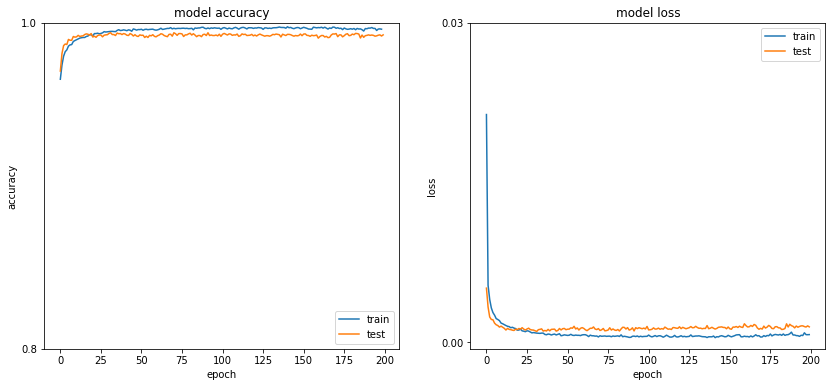

In [8]:
#Plot train/validation loss vs epoch
#Plot accuracy vs epoch
plt.figure(figsize=(14,6))
plt.subplot(121)

#### Fill in plot ####
plt.plot(history_dropout_hidden.history['acc'][1:])
plt.plot(history_dropout_hidden.history['val_acc'])
plt.yticks([0.8,1])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

#Plot loss vs epoch
plt.subplot(122)
plt.plot(history_dropout_hidden.history['loss'])
plt.plot(history_dropout_hidden.history['val_loss'])
plt.yticks([0,0.03])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
#### Fill in plot #####

# Section 2- Autoencoders

## 2.1 Linear AE 

Fill in the model:
* Input: Flattened grayscale image to 28^2 = 784-dimensional vector.
* 1st hidden: 400 perceptrons.
* 2nd hidden: 200 perceptrons.
* 3rd hidden: 100 perceptrons.
* 4th hidden: 200 perceptrons.
* 5th hidden: 400 perceptrons.
* Output: 784 perceptrons.
<br>**Activations, bias, loss function, and optimizer are your choice.
<br> Train for 150 epochs**

In [20]:
#Reshape training and testing data
data_train_reshape_fcae = data_train.reshape(-1, 784)
data_test_reshape_fcae = data_test.reshape(-1, 784)

In [21]:
# Create autoencoder architecture
def deep_ae():
    model = tf.keras.models.Sequential()
    
    # Encoder
    model.add(tf.keras.Input(shape=(784,)))
    #### Fill in the model ####
    model.add(Dense(400, activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(400, activation='relu'))
    model.add(Dense(784, activation='sigmoid'))
    # Decoder
    
    #### Fill in the model ####
    
    return model

#Create deep autoencoder graph, compile it to use mean squared error loss and the adam optimizer, train the model, create predictions
deep_ae = deep_ae()
deep_ae.compile(loss='mean_squared_error', optimizer='adam')
history_deep_ae = deep_ae.fit(data_train_reshape_fcae, data_train_reshape_fcae, validation_data=(data_test_reshape_fcae, data_test_reshape_fcae), epochs=150, batch_size=250, shuffle=True)
decoded_data = deep_ae.predict(data_test_reshape_fcae)

#Obtain encoder representation of data
get_hl = K.function([deep_ae.layers[0].input], [deep_ae.layers[2].output])
deep_ae_hl = get_hl([data_test_reshape_fcae])[0]

Train on 60000 samples, validate on 10000 samples
Epoch 1/150
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0501 - val_loss: 0.0247
Epoch 2/150
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0199 - val_loss: 0.0155
Epoch 3/150
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0143 - val_loss: 0.0122
Epoch 4/150
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0117 - val_loss: 0.0105
Epoch 5/150
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0102 - val_loss: 0.0093
Epoch 6/150
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0093 - val_loss: 0.0085
Epoch 7/150
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0085 - val_loss: 0.0080
Epoch 8/150
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0080 - val_loss: 0.0074
Epoch 9/150
60000/60000 [==============================] - 2s 27us/sample - loss: 0.00

Epoch 76/150
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0028 - val_loss: 0.0029
Epoch 77/150
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0028 - val_loss: 0.0028
Epoch 78/150
60000/60000 [==============================] - 1s 24us/sample - loss: 0.0028 - val_loss: 0.0029
Epoch 79/150
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0028 - val_loss: 0.0028
Epoch 80/150
60000/60000 [==============================] - 2s 25us/sample - loss: 0.0028 - val_loss: 0.0028
Epoch 81/150
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0028 - val_loss: 0.0028
Epoch 82/150
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0027 - val_loss: 0.0028
Epoch 83/150
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0027 - val_loss: 0.0028
Epoch 84/150
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0027 - val_loss: 0.0028
Epoch 85/150
60000/

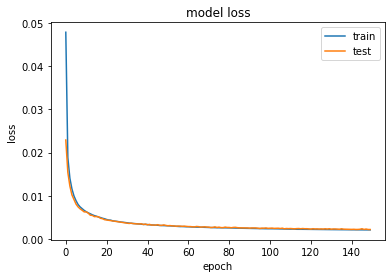

In [84]:
#Plot train/validation loss vs epoch
plt.plot(history_deep_ae.history['loss'])
plt.plot(history_deep_ae.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
#### Fill in the plot ####

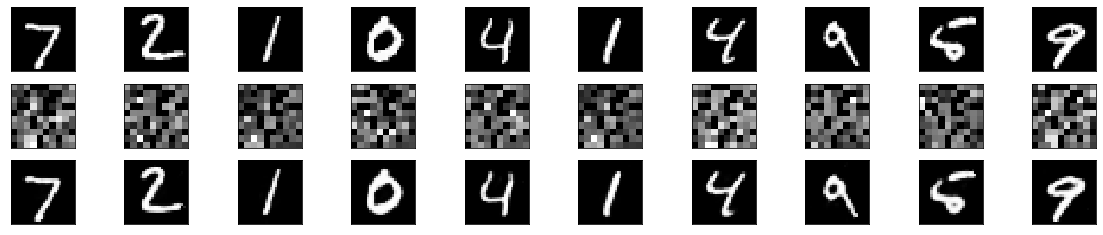

In [22]:
#Plot samples of 10 images, their hidden layer representations, and their reconstructions
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(data_test_reshape_fcae[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display hidden layer representation
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(deep_ae_hl[i].reshape(10, 10))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(decoded_data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2.2 Convolutional AE 

Fill in the model:
* Input: 28x28x1 grayscale image.
* 1st hidden: 2D convolutional layer with 16 feature maps and 3x3 filters.
* 2nd hidden: A 2x2 maxpool layer.
* 3rd hidden: 2D convolutional layer with 8 feature maps and 3x3 filters.
* 4th hidden: A 2x2 maxpool layer.
* 5th hidden: 2D convolutional layer with 8 feature maps and 3x3 filters.
* 6th hidden: A 2x2 upsample layer.
* 7th hidden: 2D convolutional layer with 16 feature maps and 3x3 filters.
* 8th hidden: A 2x2 upsample layer.
* Output: A convolutional layer with a single feature map and 3x3 filters.
<br>**All experiments with dropout set at 30%.
<br>  Activations, dropout placement, bias , loss function, and optimizer are your choice.
<br>  Train for 200 epochs**

In [101]:
#Reshape data to account for grayscale channel in each image
from tensorflow.keras.layers import UpSampling2D
data_train_reshape_cae = data_train.reshape(-1,28,28,1)
data_test_reshape_cae = data_test.reshape(-1,28,28,1)

In [106]:
#Create Convolutional AutoEncoder Architecture
def cae():
    

    #Encoder
    model = tf.keras.models.Sequential()
    #### Fill in Model ####
    model.add(tf.keras.Input(shape=(28,28,1))) 
    
    model.add(Dropout(0.3))
    model.add(Conv2D(16, (3,3), activation='relu', padding='same'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2,2), padding='same')) 
    model.add(Dropout(0.3))
    model.add(Conv2D(8, (3,3), activation='relu', padding='same'))
    model.add(Dropout(0.3))
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    #model.add(Dropout(0.3)) 

    #Decoder
    model.add(Conv2D(8, (3,3), activation='relu', padding='same'))
    model.add(Dropout(0.3))
    model.add(UpSampling2D((2,2))) 
    model.add(Dropout(0.3))
    model.add(Conv2D(16, (3,3), activation='relu', padding='same')) 
    model.add(Dropout(0.3))
    model.add(UpSampling2D((2,2)))
    model.add(Dropout(0.3))
    model.add(Conv2D(1, (3,3), activation='sigmoid', padding='same'))
    return model

#Create deep autoencoder graph, compile it to use mean squared error loss and the adam optimizer, train the model, create predictions
conv_ae = cae()
print(conv_ae.summary())
conv_ae.compile(loss='mean_squared_error', optimizer='adam')
history_conv_ae = conv_ae.fit(data_train_reshape_cae, data_train_reshape_cae, validation_data=(data_test_reshape_cae, data_test_reshape_cae), epochs=150, batch_size=250, shuffle=True)
decoded_data = conv_ae.predict(data_test_reshape_cae)

#Obtain encoder representation of data
get_hl = K.function([conv_ae.layers[0].input], [conv_ae.layers[3].output])
conv_ae_hl = get_hl([data_test_reshape_cae])[0]

Model: "sequential_64"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_208 (Conv2D)          (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_111 (MaxPoolin (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_209 (Conv2D)          (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_112 (MaxPoolin (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_210 (Conv2D)          (None, 7, 7, 8)           584       
_________________________________________________________________
up_sampling2d_49 (UpSampling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_211 (Conv2D)          (None, 14, 14, 16)      

Epoch 136/150
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0026 - val_loss: 0.0025
Epoch 137/150
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0026 - val_loss: 0.0025
Epoch 138/150
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0026 - val_loss: 0.0025
Epoch 139/150
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0026 - val_loss: 0.0025
Epoch 140/150
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0026 - val_loss: 0.0025
Epoch 141/150
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0026 - val_loss: 0.0025
Epoch 142/150
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0026 - val_loss: 0.0026
Epoch 143/150
60000/60000 [==============================] - 2s 31us/sample - loss: 0.0026 - val_loss: 0.0025
Epoch 144/150
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0026 - val_loss: 0.0025
Epoch 145/

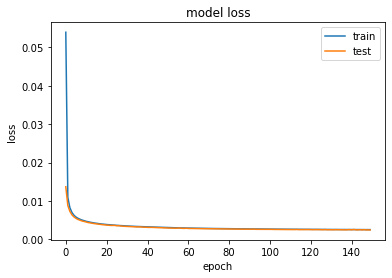

In [107]:
#Plot train/validation loss vs epoch
plt.plot(history_conv_ae.history['loss'])
plt.plot(history_conv_ae.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
#### Fill in the plot ####

<Figure size 432x288 with 0 Axes>

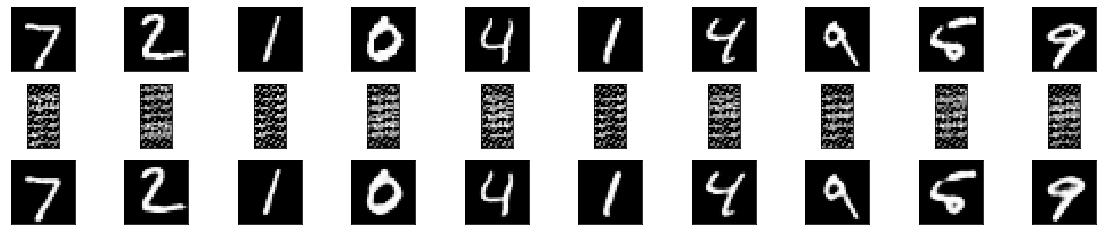

In [108]:
#Plot samples of 10 images, their hidden layer representations, and their reconstructions
n = 10  # how many digits we will display
plt.figure(3)
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(data_test_reshape_cae[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display hidden layer representation
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(conv_ae_hl[i].reshape(28, 14))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(3, n, i + 1 + n + n)
    plt.imshow(decoded_data[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 2.3 Machine Anomaly Detection

Using the dataset provided **create the autoencdoer model** you deem necessary to achieve better than 75 true positives (TP = 75) where a true instance is an anomaly.
Or detect all 143 if you can! Although anomaly 
detection thresholds can be set arbitrarily and various metrics
are used depending on the problem, we will set ours at 2 
standard deviations from the mean of "normal" data to judge TP's. Use the code provided at the bottom for calculating true positives and histogramming. 

In [4]:
#### Restart your kernal and run from here to clear some memory
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
tf.keras.backend.set_floatx('float64')

import sys
from os import listdir
from os.path import isfile, join

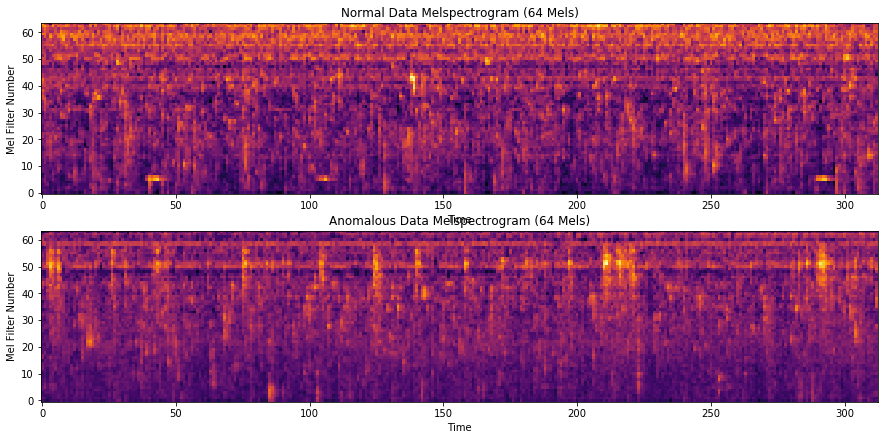

In [8]:
#### Load melspectrograms
ex_norm  = np.load('./ex_normalspec.npy')
ex_anom = np.load('./ex_abnormspec.npy')

plt.figure(figsize=(15,7))
plt.subplot(211)
plt.imshow(ex_norm[0,::-1], origin='lower', cmap='inferno')
plt.xlabel('Time')
plt.ylabel('Mel Filter Number')
plt.title('Normal Data Melspectrogram (64 Mels)') 

plt.subplot(212)
plt.imshow(ex_anom[0,::-1], origin='lower', cmap='inferno')
plt.xlabel('Time')
plt.ylabel('Mel Filter Number')
plt.title('Anomalous Data Melspectrogram (64 Mels)') 
plt.show()

In [1]:
import tensorflow as tf
tf.enable_eager_execution()
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
import pickle
import math

In [2]:
# Create your own Baseline autoencoder
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import UpSampling2D
# Model name is fixed for use by later code
tf.enable_eager_execution()
autoencoderBASE = tf.keras.models.Sequential([
   #### Fill in your model #####
    
    # Encoder
    tf.keras.Input(shape=(2504,)),
    #### Fill in the model ####
    

    #Dropout(0.3),
    #Decoder
    Dense(400, activation='relu'),
    #Dropout(0.3),
    Dense(200, activation='relu'),
    #Dropout(0.3),
    Dense(100, activation='relu'),
    #Dropout(0.3),
    Dense(200, activation='relu'),
    #Dropout(0.3),
    Dense(400, activation='relu'),
    #Dropout(0.3),
    Dense(2504, activation='sigmoid')
])

In [3]:
# Load data
normal_data = np.load('./training.npy')
holdout_set = np.load('./test_data.npy')
normal_data.shape
anomaly_data = holdout_set

In [4]:
#### General steps to follow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# Set up the data (reshape, scale, etc...
x_train, x_valid = train_test_split(normal_data,  test_size=0.2, random_state=1)
x_train = x_train.reshape(-1,2504)
x_valid = x_valid.reshape(-1,2504)
test = holdout_set.reshape(9152,-1)

scaler = MinMaxScaler().fit(x_train)
xs_train = scaler.transform(x_train)
xs_valid = scaler.transform(x_valid)

test = scaler.transform(test)
# Initialize a loss function
lossMSE = tf.keras.losses.MeanSquaredError()
autoencoderBASE.compile(loss='mean_squared_error', optimizer='adam')
history_ae = autoencoderBASE.fit(xs_train, xs_train, validation_data=(xs_valid, xs_valid), epochs=100, batch_size=1000, shuffle=True)
x_valid = xs_valid
x_train = xs_train

Train on 51200 samples, validate on 12800 samples
Epoch 1/100
51200/51200 [==============================] - 3s 59us/sample - loss: 0.0281 - val_loss: 0.0199
Epoch 2/100
51200/51200 [==============================] - 2s 35us/sample - loss: 0.0173 - val_loss: 0.0152
Epoch 3/100
51200/51200 [==============================] - 2s 34us/sample - loss: 0.0145 - val_loss: 0.0140
Epoch 4/100
51200/51200 [==============================] - 2s 34us/sample - loss: 0.0137 - val_loss: 0.0135
Epoch 5/100
51200/51200 [==============================] - 2s 36us/sample - loss: 0.0134 - val_loss: 0.0136
Epoch 6/100
51200/51200 [==============================] - 2s 40us/sample - loss: 0.0129 - val_loss: 0.0130
Epoch 7/100
51200/51200 [==============================] - 2s 39us/sample - loss: 0.0122 - val_loss: 0.0119
Epoch 8/100
51200/51200 [==============================] - 2s 39us/sample - loss: 0.0115 - val_loss: 0.0112
Epoch 9/100
51200/51200 [==============================] - 2s 38us/sample - loss: 0.01

Epoch 76/100
51200/51200 [==============================] - 2s 31us/sample - loss: 0.0019 - val_loss: 0.0017
Epoch 77/100
51200/51200 [==============================] - 2s 34us/sample - loss: 0.0017 - val_loss: 0.0017
Epoch 78/100
51200/51200 [==============================] - 2s 32us/sample - loss: 0.0017 - val_loss: 0.0018
Epoch 79/100
51200/51200 [==============================] - 2s 33us/sample - loss: 0.0018 - val_loss: 0.0017
Epoch 80/100
51200/51200 [==============================] - 2s 35us/sample - loss: 0.0017 - val_loss: 0.0017
Epoch 81/100
51200/51200 [==============================] - 2s 31us/sample - loss: 0.0017 - val_loss: 0.0019
Epoch 82/100
51200/51200 [==============================] - 2s 32us/sample - loss: 0.0017 - val_loss: 0.0018
Epoch 83/100
51200/51200 [==============================] - 2s 34us/sample - loss: 0.0017 - val_loss: 0.0016
Epoch 84/100
51200/51200 [==============================] - 2s 34us/sample - loss: 0.0018 - val_loss: 0.0017
Epoch 85/100
51200/

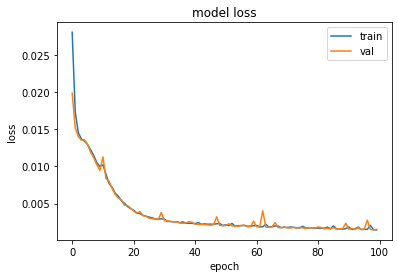

In [5]:
# Plot loss versus epoch.
plt.plot(history_ae.history['loss'])
plt.plot(history_ae.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
#### Fill in the plot ####

The mean of normal data is 0.0015        and standard deviation is 0.0001


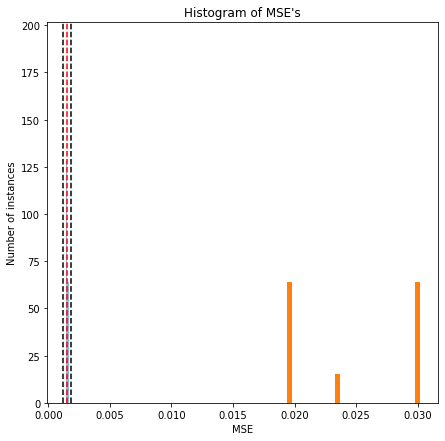

In [6]:
######### This code should remain untouched or autograder will 
######### give zero points.
#### Feed your data through to get mean and std
#### If you did not use a validation set then only use
#### your training data. Concatenating is therefore un-needed.
loss_list = []
# Combine train and validation data and get MSE's
dataset = (tf.data.Dataset.from_tensor_slices(np.concatenate((x_train,x_valid)))).batch(64)
for i, batch in dataset.enumerate():
    ae_predictions = autoencoderBASE(batch).numpy()
    loss_list.append(lossMSE(batch, ae_predictions).numpy())
# Feed the anomaly data through to get its MSE's
anom_list = []
anomset = (tf.data.Dataset.from_tensor_slices(test)).batch(64)
for i, batch in anomset.enumerate():
    ae_predictions = autoencoderBASE(batch).numpy()
    anom_list.append(lossMSE(batch, ae_predictions).numpy())
    
normal_data_MSEs = np.array(loss_list)
abnormal_data_MSEs = np.array(anom_list)
######## Code for presenting answer to Question 2.3 ################## 
threshold = 2.0
mean = normal_data_MSEs.mean()
std = normal_data_MSEs.std()
print(f'The mean of normal data is {mean:.4f}\
        and standard deviation is {std:.4f}')
upperbound = mean+threshold*std
lowerbound = mean-threshold*std
plt.figure(figsize=(7,7))
plt.title('Histogram of MSE\'s')
plt.hist(normal_data_MSEs, bins=50, alpha=0.5)
plt.hist(abnormal_data_MSEs, bins=25, alpha=1.0)
plt.axvline(mean,ls='--', c='r')
plt.axvline(lowerbound, ls='--',c='k')
plt.axvline(upperbound, ls='--',c='k')
plt.xlabel('MSE')
plt.ylabel('Number of instances')
plt.show()

In [12]:
tp_count = np.sum(abnormal_data_MSEs >= upperbound) +\
           np.sum(abnormal_data_MSEs <= lowerbound)
tn_count = anomaly_data.shape[0] - tp_count
fp_count = np.sum(normal_data_MSEs >= upperbound)+\
           np.sum(normal_data_MSEs <= lowerbound)
fn_count = 1000 - fp_count

print(f'TP {tp_count} \t TN {tn_count}')
print(f'FP {fp_count} \t FN {fn_count}')

TP 143 	 TN 0
FP 40 	 FN 960


In [10]:
std

0.00014989587

In [11]:
abnormal_data_MSEs.std()

0.005131171

In [45]:
anom_list = []
anomset = (tf.data.Dataset.from_tensor_slices(test)).batch(64)
for i, batch in anomset.enumerate():
    print(i)
    ae_predictions = autoencoderBASE(batch).numpy()
    anom_list.append(lossMSE(batch, ae_predictions).numpy())

tf.Tensor(0, shape=(), dtype=int64)


InvalidArgumentError: Matrix size-incompatible: In[0]: [64,2504], In[1]: [20032,400] [Op:MatMul]